In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib as jbl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df = df[["survived", "sex", "age", "fare", "class"]]
df.dropna(inplace=True)

In [5]:
df.head()

,survived,sex,age,fare,class
0,0,male,22.0,7.2500,Third
1,1,female,38.0,71.2833,First
2,1,female,26.0,7.9250,Third
3,1,female,35.0,53.1000,First
4,0,male,35.0,8.0500,Third


In [6]:
le_sex = LabelEncoder()
le_class = LabelEncoder()

In [7]:
df["sex"] = le_sex.fit_transform(df["sex"])
df["class"] = le_class.fit_transform(df["class"])

In [8]:
df.head()

,survived,sex,age,fare,class
0,0,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,1,0,26.0,7.9250,2
3,1,0,35.0,53.1000,0
4,0,1,35.0,8.0500,2


In [9]:
X = df[["sex", "age", "fare", "class"]]
y = df["survived"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7552447552447552


In [13]:
confusion_matrix(y_test, y_pred)

array([[68, 19],
       [16, 40]])

In [14]:
report = classification_report(y_test, y_pred, output_dict=True)

In [15]:
df_report = pd.DataFrame(report).transpose()

In [16]:
df_report

,precision,recall,f1-score,support
0,0.809524,0.781609,0.795322,87.000000
1,0.677966,0.714286,0.695652,56.000000
accuracy,0.755245,0.755245,0.755245,0.755245
macro avg,0.743745,0.747947,0.745487,143.000000
weighted avg,0.758005,0.755245,0.756290,143.000000


Text(0.5, 1.0, 'confusion_matrix')

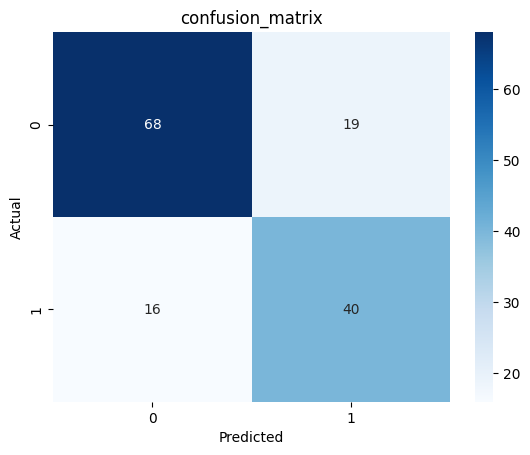

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion_matrix")

# KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=7))
])

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy : {knn_acc}")


KNN Classifier Accuracy : 0.7762237762237763


# Arbre de Décision (Decision Tree Classifier)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy : {dt_acc}")


Decision Tree Accuracy : 0.7202797202797203


# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy : {rf_acc}")


Random Forest Accuracy : 0.7902097902097902


In [20]:
import joblib

joblib.dump(model, "../backend/models/logistic_model.pkl")
joblib.dump(knn_model, "../backend/models/knn_classifier.pkl")
joblib.dump(dt_model, "../backend/models/decision_tree_classifier.pkl")
joblib.dump(rf_model, "../backend/models/random_forest_classifier.pkl")


['../backend/models/random_forest_classifier.pkl']